Random Forest Classifier

The goal is to determine which factors are most important for a victory, predict game wins, and based on exploratory data analysis and classifier, determine what constitutes as a winning strategy 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv(r'Downloads\legenddataset\games.csv') 

In [25]:
data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [26]:
data.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [3]:
df = data[['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
           'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 
           't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 
           't2_dragonKills', 't2_riftHeraldKills']]

In [4]:
df.rename(columns={'winner': 'winning_team'}, inplace=True)

C:\Users\darke\AppData\Local\Temp\ipykernel_98344\2851456593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'winner': 'winning_team'}, inplace=True)


C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 10000x10000 with 0 Axes>

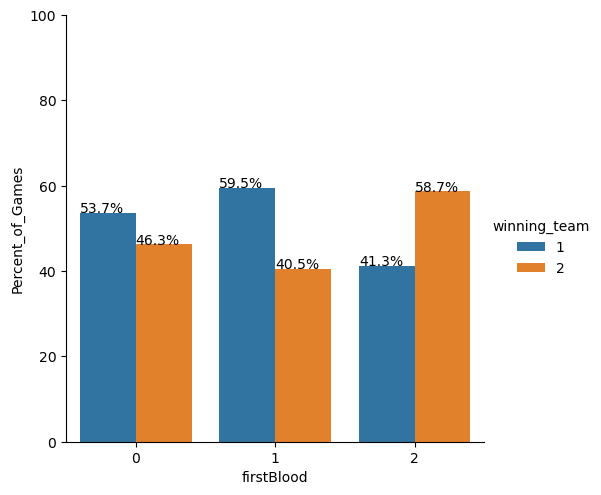

C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


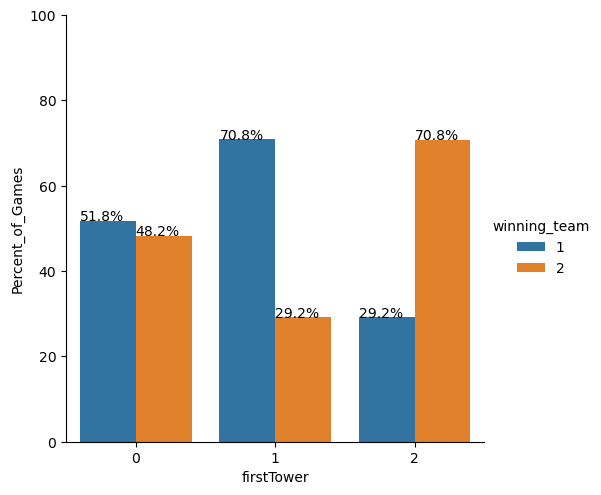

C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


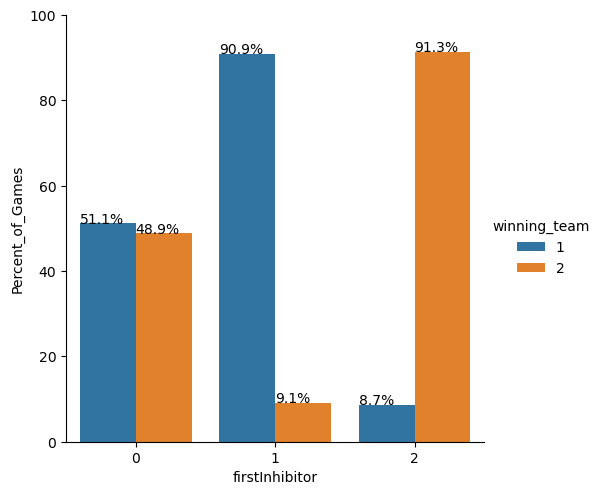

C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


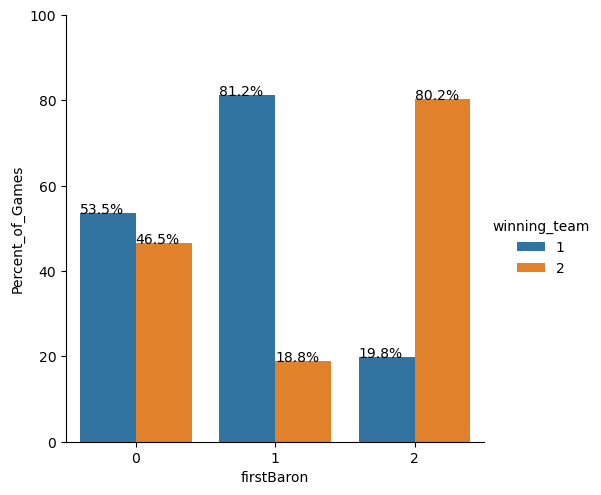

C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


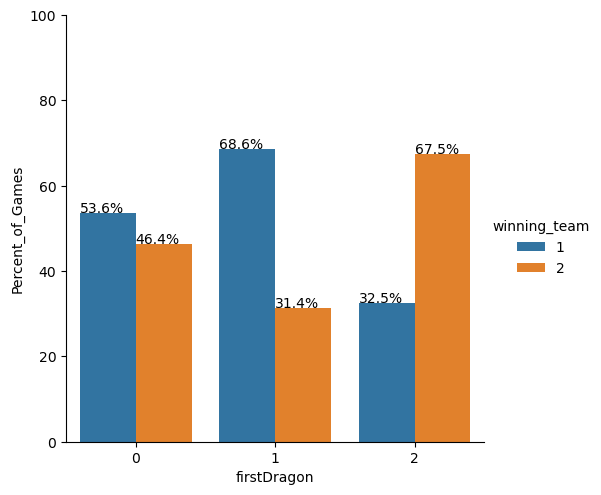

C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


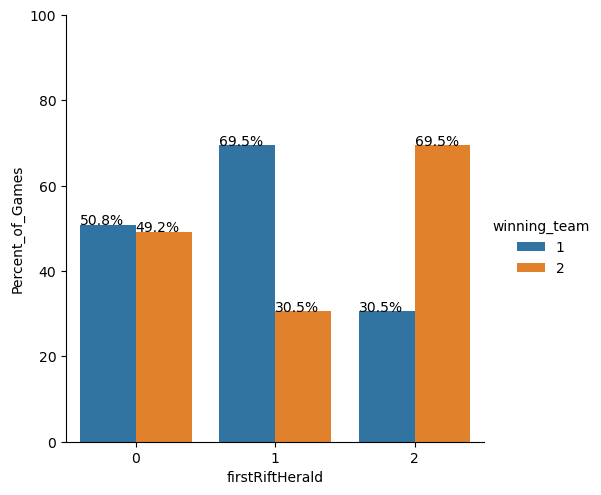

In [31]:
def first_claims(df, columns_list):
    fig = plt.figure(figsize=(100, 100))
    for i in range(len(columns_list)):
        col = columns_list[i]
        new_df = df.groupby(col)['winning_team'].value_counts(normalize=True)
        new_df = new_df.mul(100).rename('Percent_of_Games').reset_index()

        g = sns.catplot(x=col, y='Percent_of_Games', hue='winning_team', kind='bar', data=new_df)
        g.ax.set_ylim(0,100)

        for p in g.ax.patches:
            txt = str(p.get_height().round(1)) + '%'
            txt_x = p.get_x()
            txt_y = p.get_height()
            g.ax.text(txt_x,txt_y,txt)

        
        plt.show()
        
first_claims(df, ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
           'firstDragon', 'firstRiftHerald'])

C:\Users\darke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


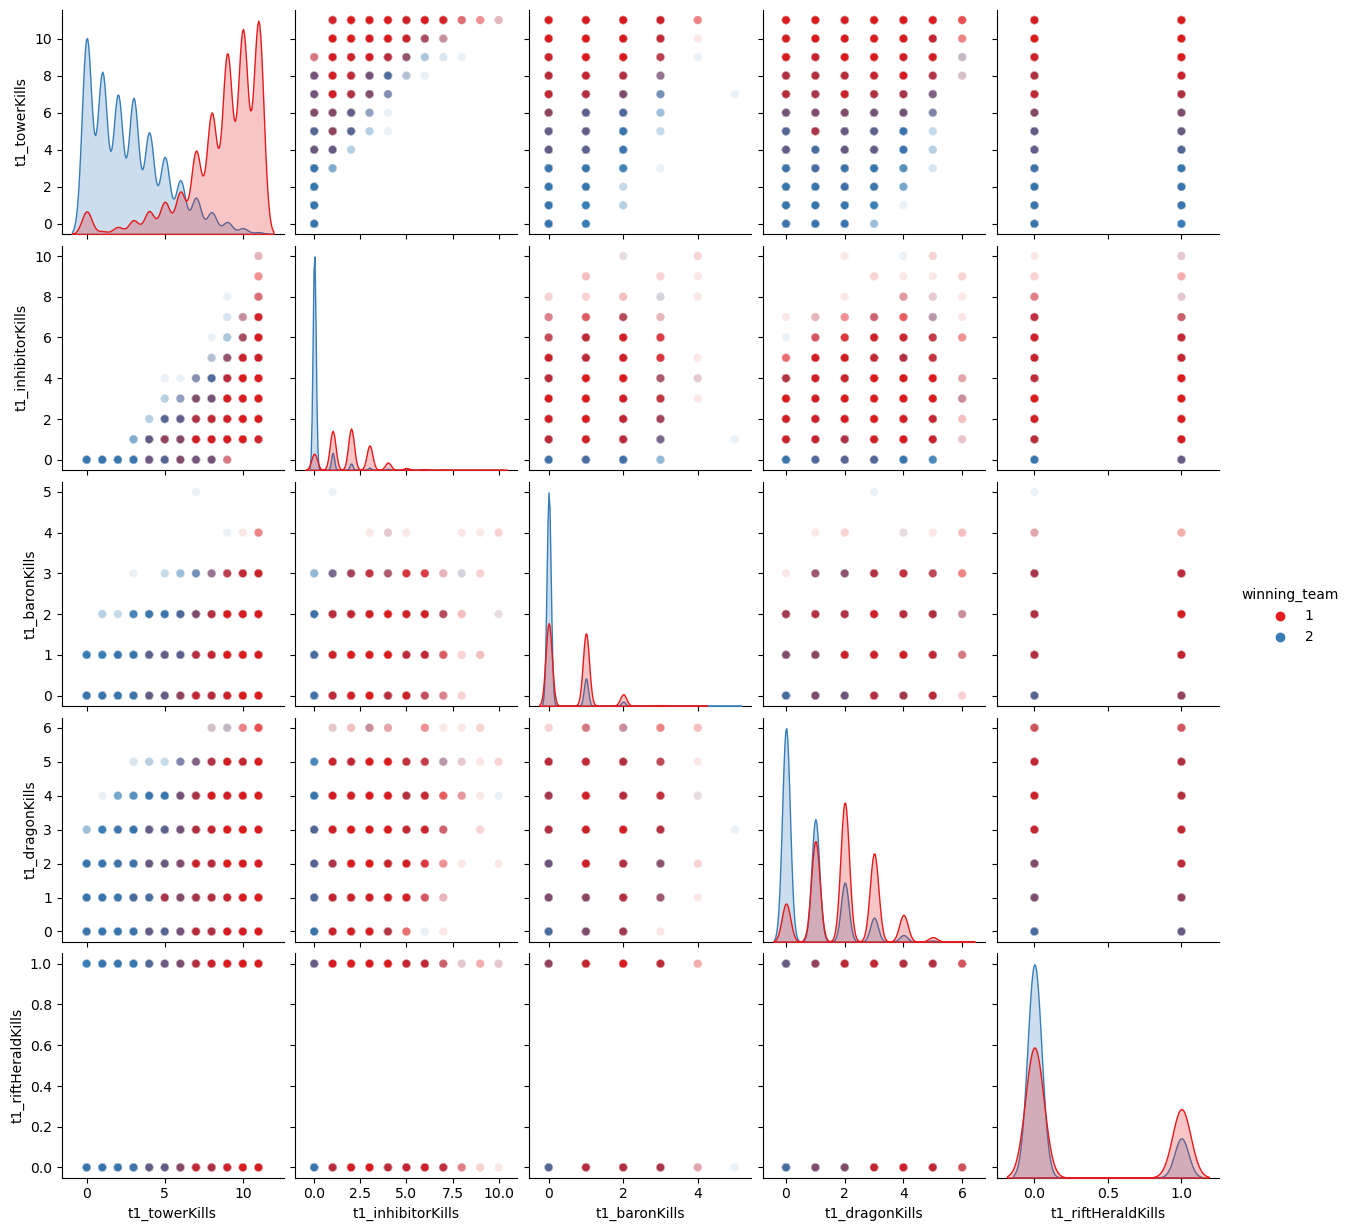

In [36]:
kill_count_team1 = df[['winning_team', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 
           't1_dragonKills', 't1_riftHeraldKills']]



sns.pairplot(data=kill_count_team1, hue='winning_team', plot_kws={'alpha': 0.1}, palette='Set1')
plt.show()

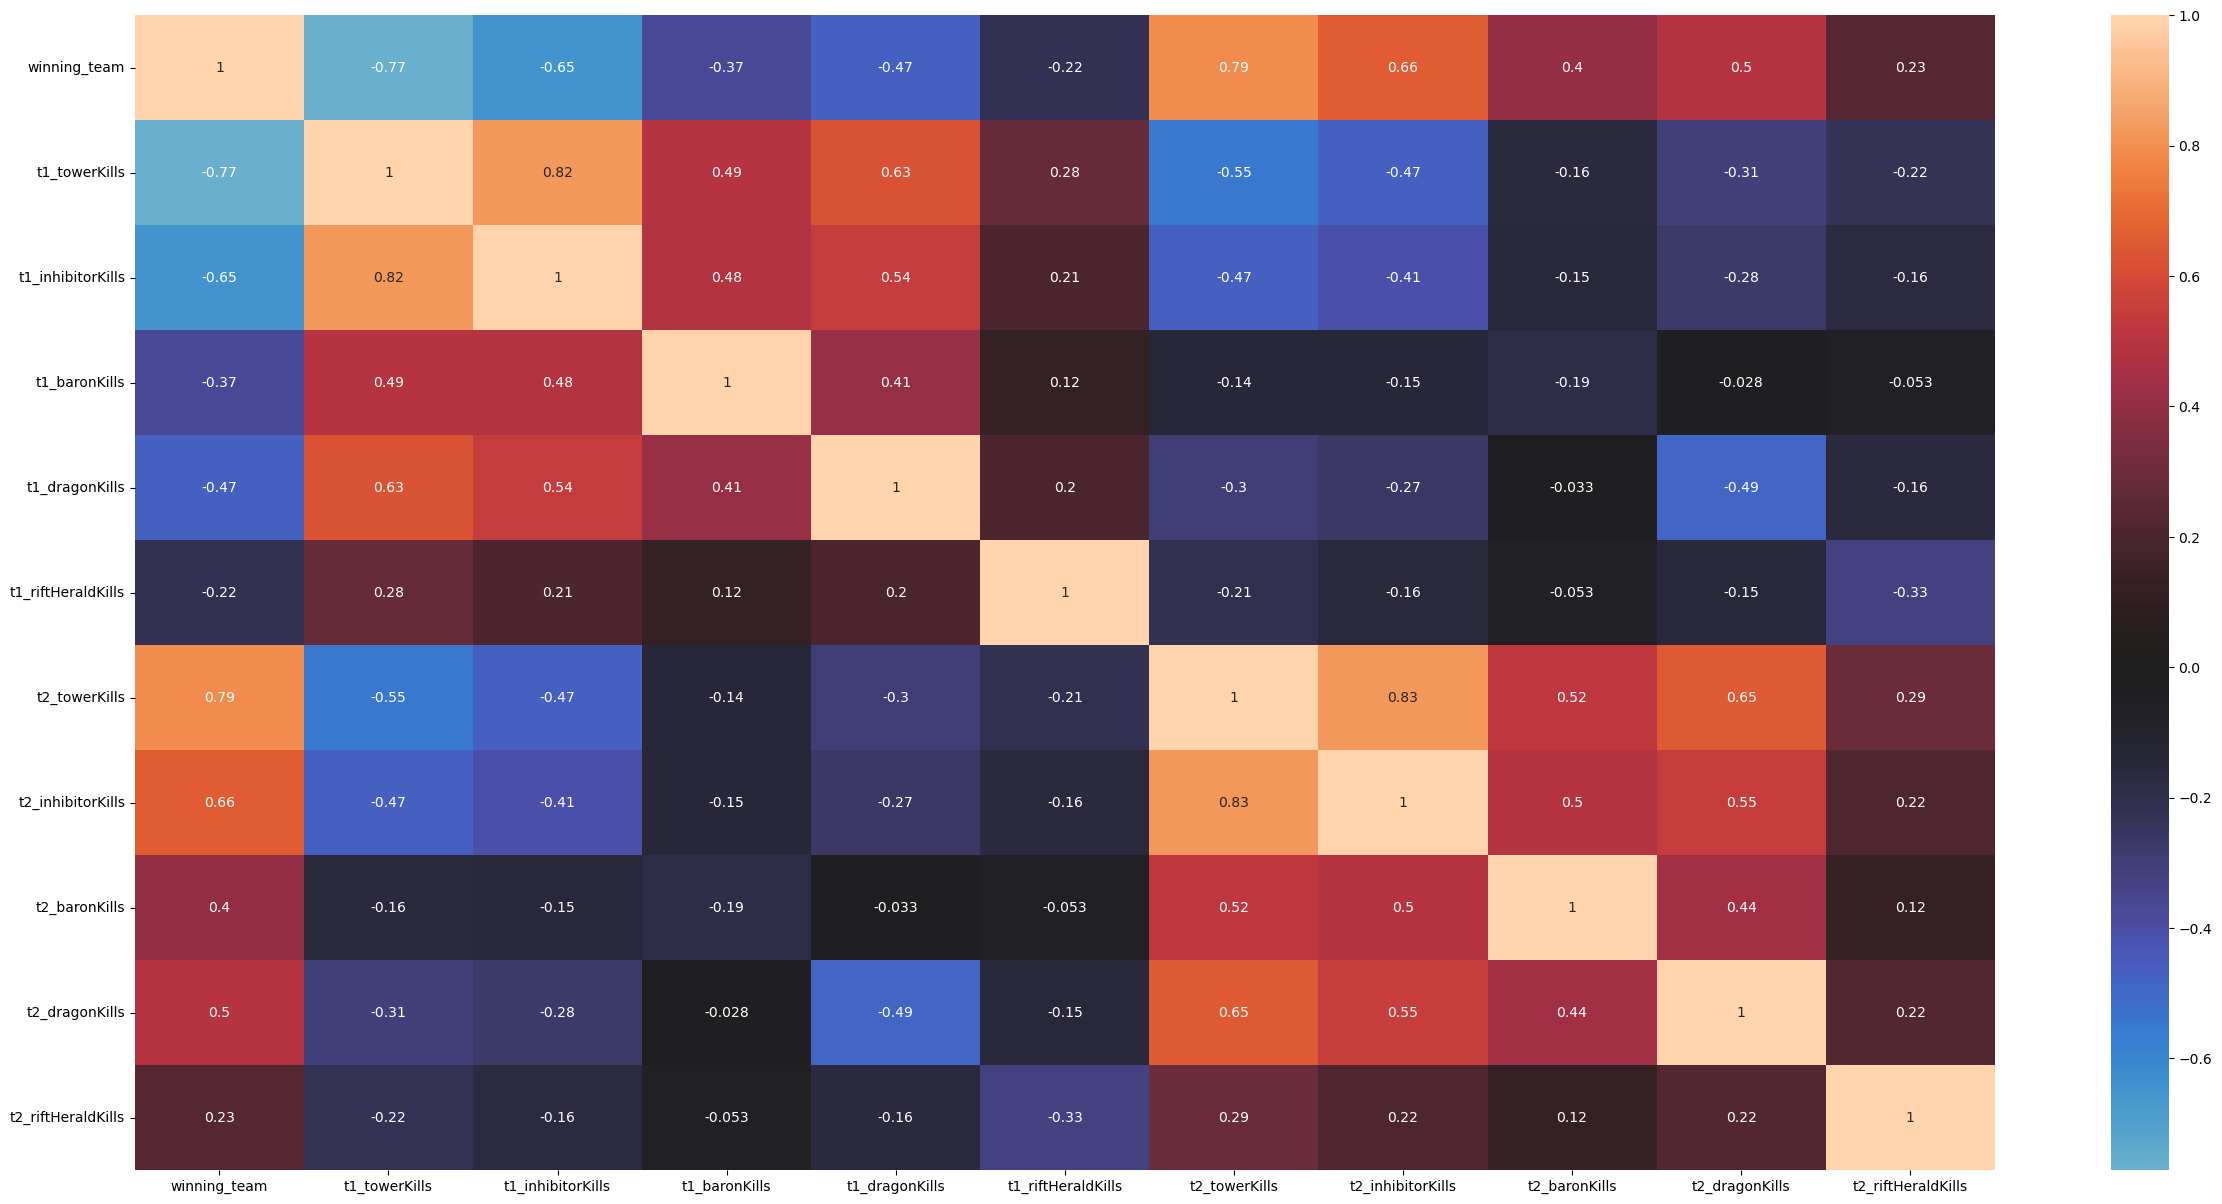

In [37]:
kill_count = df[['winning_team', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 
           't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 
           't2_dragonKills', 't2_riftHeraldKills']]

fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(kill_count.corr(), center=0, annot=True)
plt.show()

In [40]:
features = df[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
           'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 
           't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 
           't2_dragonKills', 't2_riftHeraldKills']]

target = df[['winning_team']]

x_train, x_test, y_train, y_test = train_test_split(features, target)


In [41]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
print('Accuracy = ' + str(random_forest.score(x_test, y_test)))

y_pred_test = random_forest.predict(x_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

C:\Users\darke\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy = 0.9721898547347161
[[6302  144]
 [ 214 6213]]
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      6446
           2       0.98      0.97      0.97      6427

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



                    importance
feature                       
t2_towerKills            0.226
t1_towerKills            0.201
t2_inhibitorKills        0.201
t1_inhibitorKills        0.154
firstInhibitor           0.074
t2_dragonKills           0.036
t1_dragonKills           0.025
firstTower               0.018
t2_baronKills            0.017
t1_baronKills            0.016
firstBaron               0.011
firstBlood               0.006
firstDragon              0.006
firstRiftHerald          0.004
t1_riftHeraldKills       0.002
t2_riftHeraldKills       0.002


<Axes: xlabel='feature'>

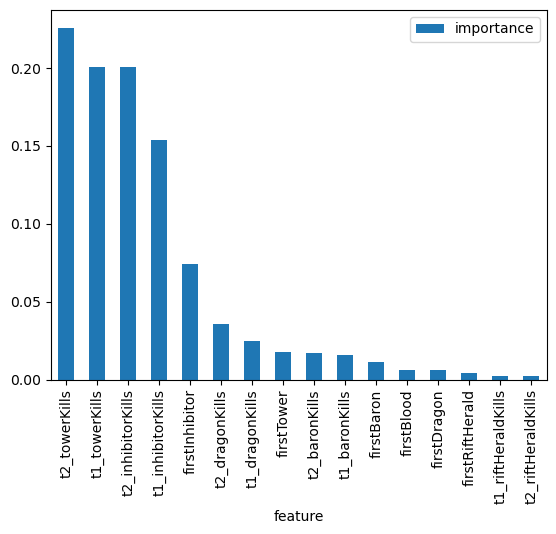

In [42]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
print(importances)
importances.plot.bar()


In [43]:
features = df[['firstInhibitor', 't1_towerKills', 't1_inhibitorKills', 't2_towerKills', 't2_inhibitorKills']]

target = df[['winning_team']]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [44]:
features = df[['firstInhibitor', 't1_towerKills', 't1_inhibitorKills', 't2_towerKills', 't2_inhibitorKills']]

target = df[['winning_team']]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [45]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
print('Accuracy = ' + str(random_forest.score(X_test, y_test)))

y_pred_test = random_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

C:\Users\darke\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy = 0.9667521168336829
[[6335  133]
 [ 295 6110]]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97      6468
           2       0.98      0.95      0.97      6405

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



In [46]:
y_test.value_counts(normalize=True)


winning_team
1               0.502447
2               0.497553
Name: proportion, dtype: float64

In [34]:
from xgboost import XGBClassifier
import xgboost

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [9]:
log_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

In [12]:
data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [23]:
y = data['winner']
newdata = data.drop(columns=['gameId', 'creationTime', 'seasonId', 'winner'])
y_transformed = y - 1

In [24]:
X = newdata

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed)

In [26]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [27]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [28]:
y_pred_xgb = xgb.predict(X_test)

In [31]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [32]:
accuracy_xgb

0.96931562184417

In [36]:
dtrain = xgboost.DMatrix(X, label=y_transformed)


params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'eta': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Run cross-validation
cv_results = xgboost.cv(
    params,
    dtrain,
    num_boost_round=1000,
    nfold=5,
    metrics={'logloss'},
    early_stopping_rounds=50,
    stratified=True,
    seed=42
)

print(cv_results)

     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.684312           0.000021           0.684323   
1              0.675726           0.000048           0.675744   
2              0.667361           0.000138           0.667387   
3              0.659239           0.000272           0.659281   
4              0.651216           0.000313           0.651272   
..                  ...                ...                ...   
995            0.054264           0.000340           0.062806   
996            0.054246           0.000340           0.062804   
997            0.054230           0.000341           0.062801   
998            0.054212           0.000342           0.062797   
999            0.054198           0.000342           0.062795   

     test-logloss-std  
0            0.000013  
1            0.000091  
2            0.000194  
3            0.000292  
4            0.000244  
..                ...  
995          0.001571  
996          0.001571  
997

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
params_random_search = {
    'learning_rate': np.arange(0.01, 1.01, 0.01),
    'n_estimators': [200],
    'max_depth': range(2, 12),
    'subsample': np.arange(0.02, 1.02, 0.02)
}


In [41]:
xg_random_reg = xgboost.XGBRegressor(objective= "reg:squarederror")

In [43]:
randomized_mse = RandomizedSearchCV(param_distributions=params_random_search, estimator=xg_random_reg,
                                    scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)

In [48]:
randomized_mse.fit(X, y_transformed)
from sklearn.model_selection import cross_val_score

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [45]:
print("Randomize Search Cross Validation")
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Randomize Search Cross Validation
Best parameters found:  {'subsample': 0.22, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.02}
Lowest RMSE found:  0.14352207726057323


In [46]:
modelhmm = XGBClassifier(eval_metric='logloss')

In [51]:
scoress = cross_val_score(modelhmm, X, y_transformed, cv=5, scoring='accuracy')

In [52]:
print("Accuracy per fold: ", scoress)

# Print the mean accuracy of the cross-validation
print("Average accuracy: ", np.mean(scoress))

Accuracy per fold:  [0.97028549 0.97154787 0.96979996 0.96989707 0.97232472]
Average accuracy:  0.9707710234997087


In [53]:
plot_importance

NotFittedError: need to call fit or load_model beforehand

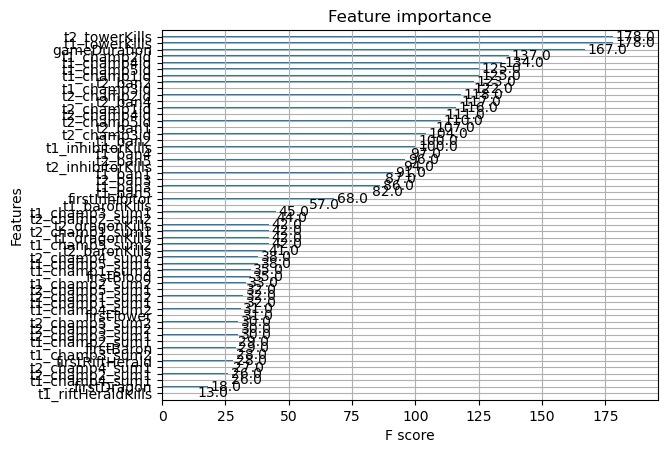

In [56]:
xgboost.plot_importance(xgb)
plt.show()


In [84]:
with open(r'Downloads\legenddataset\champion_info.json') as file:
    data1 = json.load(file)
    
with open(r'Downloads\legenddataset\champion_info_2.json') as file:
    data2 = json.load(file)

In [85]:
combined_data = {**data1['data'], **data2['data']}


In [86]:
combined_data

{'1': {'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'},
 '2': {'title': 'the Berserker', 'id': 2, 'key': 'Olaf', 'name': 'Olaf'},
 '3': {'title': 'the Colossus', 'id': 3, 'key': 'Galio', 'name': 'Galio'},
 '4': {'title': 'the Card Master',
  'id': 4,
  'key': 'TwistedFate',
  'name': 'Twisted Fate'},
 '5': {'title': 'the Seneschal of Demacia',
  'id': 5,
  'key': 'XinZhao',
  'name': 'Xin Zhao'},
 '6': {'title': 'the Dreadnought', 'id': 6, 'key': 'Urgot', 'name': 'Urgot'},
 '7': {'title': 'the Deceiver', 'id': 7, 'key': 'Leblanc', 'name': 'LeBlanc'},
 '8': {'title': 'the Crimson Reaper',
  'id': 8,
  'key': 'Vladimir',
  'name': 'Vladimir'},
 '9': {'title': 'the Harbinger of Doom',
  'id': 9,
  'key': 'Fiddlesticks',
  'name': 'Fiddlesticks'},
 '10': {'title': 'The Judicator', 'id': 10, 'key': 'Kayle', 'name': 'Kayle'},
 '11': {'title': 'the Wuju Bladesman',
  'id': 11,
  'key': 'MasterYi',
  'name': 'Master Yi'},
 '12': {'title': 'the Minotaur',
  'id': 12,
  'key

In [87]:
champions = [{'id': champ_info['id'], 'name': champ_info['name']} for champ_info in combined_data.values()]


In [89]:
champions

[{'id': 1, 'name': 'Annie'},
 {'id': 2, 'name': 'Olaf'},
 {'id': 3, 'name': 'Galio'},
 {'id': 4, 'name': 'Twisted Fate'},
 {'id': 5, 'name': 'Xin Zhao'},
 {'id': 6, 'name': 'Urgot'},
 {'id': 7, 'name': 'LeBlanc'},
 {'id': 8, 'name': 'Vladimir'},
 {'id': 9, 'name': 'Fiddlesticks'},
 {'id': 10, 'name': 'Kayle'},
 {'id': 11, 'name': 'Master Yi'},
 {'id': 12, 'name': 'Alistar'},
 {'id': 13, 'name': 'Ryze'},
 {'id': 14, 'name': 'Sion'},
 {'id': 15, 'name': 'Sivir'},
 {'id': 16, 'name': 'Soraka'},
 {'id': 17, 'name': 'Teemo'},
 {'id': 18, 'name': 'Tristana'},
 {'id': 19, 'name': 'Warwick'},
 {'id': 20, 'name': 'Nunu'},
 {'id': 21, 'name': 'Miss Fortune'},
 {'id': 22, 'name': 'Ashe'},
 {'id': 23, 'name': 'Tryndamere'},
 {'id': 24, 'name': 'Jax'},
 {'id': 25, 'name': 'Morgana'},
 {'id': 26, 'name': 'Zilean'},
 {'id': 27, 'name': 'Singed'},
 {'id': 28, 'name': 'Evelynn'},
 {'id': 29, 'name': 'Twitch'},
 {'id': 30, 'name': 'Karthus'},
 {'id': 31, 'name': "Cho'Gath"},
 {'id': 32, 'name': 'Amumu'}

In [90]:
champion_df = pd.DataFrame(champions)


In [91]:
champion_df

,id,name
0,1,Annie
1,2,Olaf
2,3,Galio
3,4,Twisted Fate
4,5,Xin Zhao
...,...,...
272,96,Kog'Maw
273,103,Ahri
274,133,Quinn
275,7,LeBlanc


In [92]:
unique_champion_df = champion_df.drop_duplicates()

In [93]:
unique_champion_df

,id,name
0,1,Annie
1,2,Olaf
2,3,Galio
3,4,Twisted Fate
4,5,Xin Zhao
...,...,...
134,432,Bard
135,497,Rakan
136,498,Xayah
137,516,Ornn


In [94]:
valid_champion_df = unique_champion_df[champion_df['id'] > 0]

C:\Users\darke\AppData\Local\Temp\ipykernel_98344\754255863.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_champion_df = unique_champion_df[champion_df['id'] > 0]


In [95]:
valid_champion_df 

,id,name
0,1,Annie
1,2,Olaf
2,3,Galio
3,4,Twisted Fate
4,5,Xin Zhao
...,...,...
133,429,Kalista
134,432,Bard
135,497,Rakan
136,498,Xayah


,id,name
